# 1. data preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data from Excel file and sheet
# 从Excel文件和表中加载数据
file_path = R"DryBeanDataset\Dry_Bean_Dataset.xlsx"
sheet_name = 'Dry_Beans_Dataset'

df = pd.read_excel(file_path, sheet_name=sheet_name)
print("data loaded!")

print("\n 1.Initial Data Overview")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset information:")
df.info()

# 1. Check for missing values
# 检查缺失值
print("\n2.Missing Value Check")
missing_values = df.isnull().sum() # 计算每列缺失值的数量
print("Missing values per column:")   
print(missing_values) 

# 是否有缺失值 if any missing values
if missing_values.sum() == 0:
    print("\nNo missing values found in the dataset.")
else:
    print("\nMissing values found. Imputation would be needed.")


# Determine and separate features X and target y 确定特征X和目标y
X = df.drop('Class', axis=1)  # 特征X
y = df['Class']  # 目标y

print("\n3.Handling Categorical Data")
# Class column is categorical. use LabelEncoder
# 目标列是Class。这里使用LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display sample of original and encoded labels
# 显示原始和编码标签的样本
print("Original class labels (sample):", y.unique()[:5])
print("Encoded class labels (sample):", pd.Series(y_encoded).unique()[:5])
print(f"Mapping of original labels to encoded integers:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name}: {i}")

# 2. Feature Standardization
print("\n4.Feature Standardization")
# Standardize features using StandardScaler
# 使用StandardScaler标准化特征
numerical_features = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for inspection
# 将缩放的特征转回DataFrame进行检查
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)

print("First 5 rows of scaled features:")
print(X_scaled_df.head())
print("\nMean of scaled features (approx 0):")
print(X_scaled_df.mean())
print("\nStandard deviation of scaled features (approx 1):")
print(X_scaled_df.std())

print("\n--- Preprocessing Complete ---")
print("Shape of features (X_scaled):", X_scaled_df.shape)
print("Shape of target (y_encoded):", y_encoded.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'DryBeanDataset\\Dry_Bean_Dataset.xlsx'

# 2. use t-SNE to reduce dimension and visualize the distribution of data

--- Starting t-SNE Visualization ---


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE transformation complete.
Shape of t-SNE embedded data: (13611, 2)
Displaying t-SNE plot...


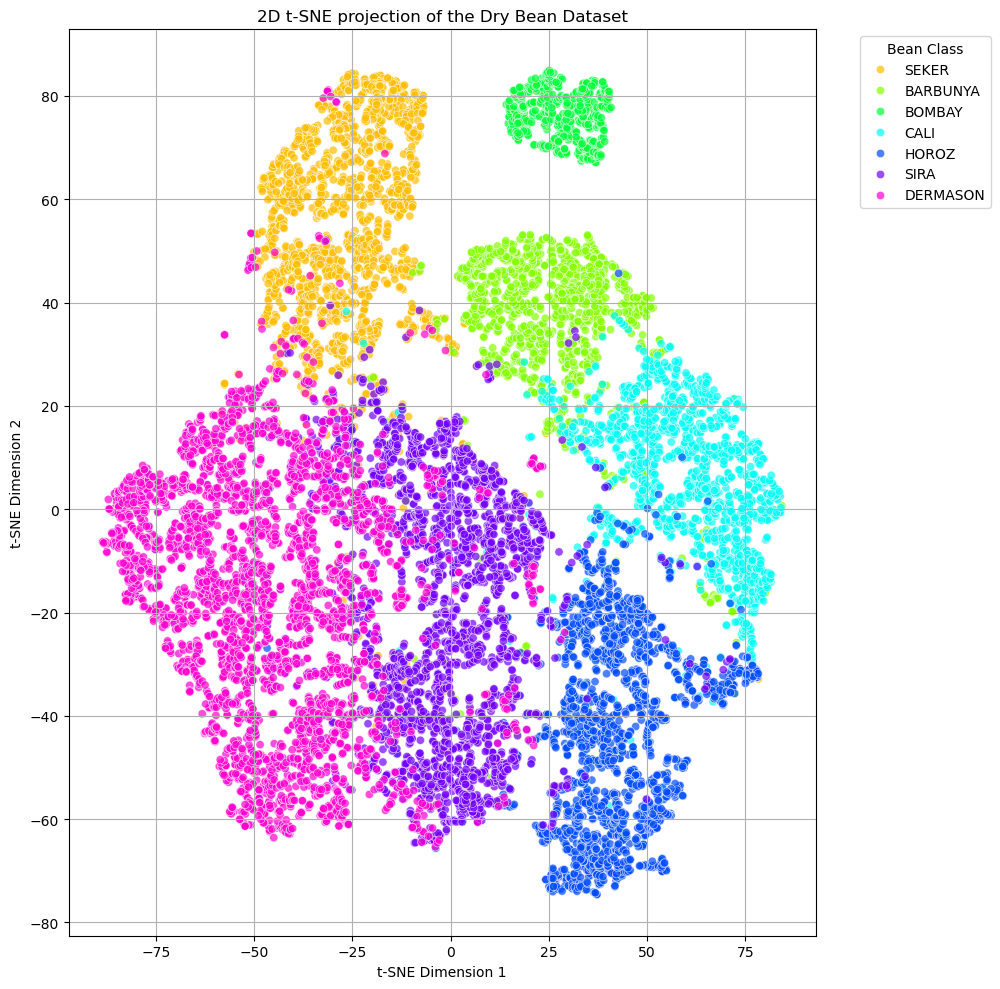

--- t-SNE Visualization Complete ---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

print("--- Starting t-SNE Visualization ---")

# set t-SNE parameters 设置 t-SNE 参数
tsne = TSNE(
    n_components=2,         # 降维至2维
    random_state=42,        # 设置随机种子确保可重复性
    perplexity=30,         # 困惑度参数
    n_iter=1000,           # 迭代次数
    learning_rate=200      # 学习率
)

# X_scaled_df 是一个 DataFrame，否则将其转换为 NumPy 数组
if isinstance(X_scaled_df, pd.DataFrame):
    features_for_tsne = X_scaled_df.values
else:
    features_for_tsne = X_scaled_df
X_tsne = tsne.fit_transform(features_for_tsne)

print("t-SNE transformation complete.")
print("Shape of t-SNE embedded data:", X_tsne.shape)

# Create a DataFrame for t-SNE data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE_Dimension_1', 'TSNE_Dimension_2'])
tsne_df['Class_Encoded'] = y_encoded
tsne_df['Class_Original'] = label_encoder.inverse_transform(y_encoded) # For legend

# Create the scatter plot
# 创建散点图
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='TSNE_Dimension_1', y='TSNE_Dimension_2',  # 降维后的维度
    hue='Class_Original', # 类别标签
    palette=sns.color_palette("hsv", n_colors=len(label_encoder.classes_)),  # 对应的颜色 
    data=tsne_df,   # 数据
    legend="full",  # 显示图例
    alpha=0.7       # 点的透明度
)

plt.title('2D t-SNE projection of the Dry Bean Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Bean Class', bbox_to_anchor=(1.05, 1), loc='upper left') # 调整图例位置
plt.tight_layout(rect=[0,0,0.85,1]) # 调整布局以留出空间给图例 adjust layout for legend
plt.grid(True) # 添加网格 add grid
print("Displaying t-SNE plot...") 
plt.show()

print("--- t-SNE Visualization Complete ---")

# 3. clustering and visualization analysis

Number of true classes (for evaluation reference): 7

--- K-Means Clustering ---
K-Means Silhouette Score: 0.3094
K-Means Adjusted Rand Index (ARI): 0.6687
K-Means Normalized Mutual Information (NMI): 0.7138
K-Means Homogeneity: 0.7048
K-Means Completeness: 0.7229
K-Means V-measure: 0.7138

--- Agglomerative Hierarchical Clustering ---
Agglomerative Silhouette Score: 0.2839
Agglomerative Adjusted Rand Index (ARI): 0.6580
Agglomerative Normalized Mutual Information (NMI): 0.7325
Agglomerative Homogeneity: 0.7083
Agglomerative Completeness: 0.7584
Agglomerative V-measure: 0.7325

Displaying clustering visualizations on t-SNE projection...


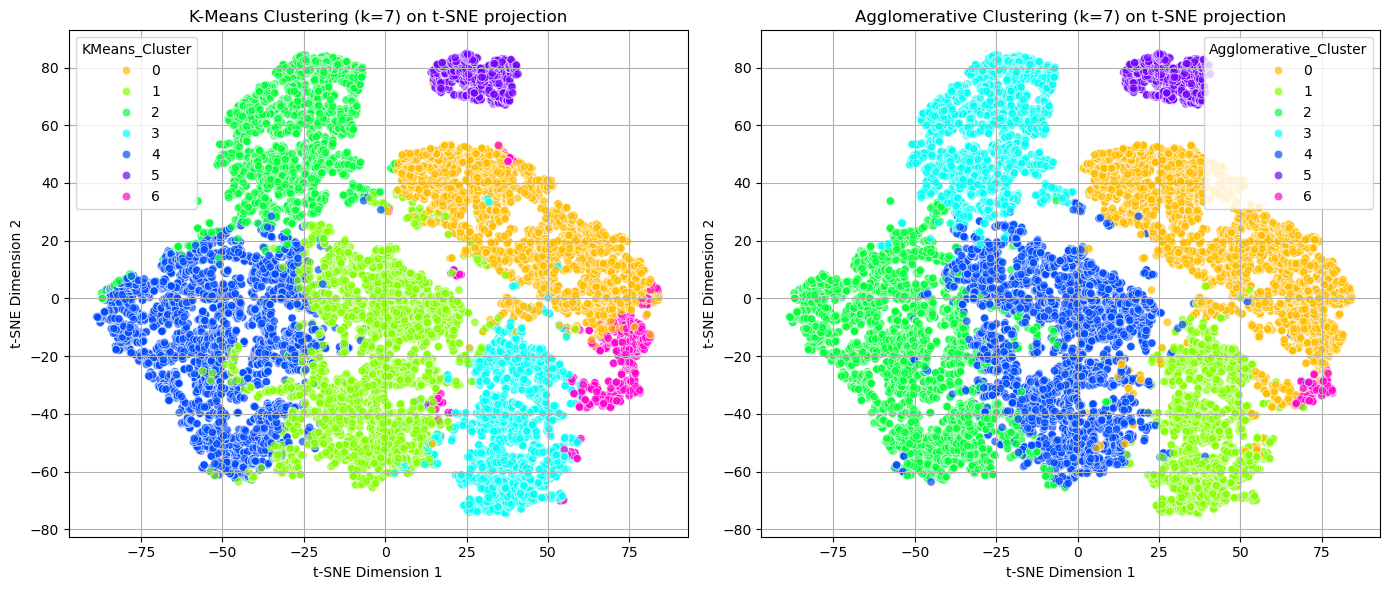


--- Clustering Analysis Complete ---


In [ ]:
# 因为懒得查看导入的库，所以重复导入了
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# 检查类别数 check the number of classes
n_true_clusters = len(label_encoder.classes_) # it should be 7 for this dataset 七个类
print(f"Number of true classes (for evaluation reference): {n_true_clusters}") 

if isinstance(X_scaled_df, pd.DataFrame):
    features_for_clustering = X_scaled_df.values
else:
    features_for_clustering = X_scaled_df

# 1.K-Means Clustering
print("\n1.K-Means Clustering")
kmeans = KMeans(n_clusters=n_true_clusters, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(features_for_clustering)

# K-Means‘s Evaluation Metrics # K-Means算法的各种评估指标
kmeans_silhouette = silhouette_score(features_for_clustering, kmeans_labels)
kmeans_ari = adjusted_rand_score(y_encoded, kmeans_labels)
kmeans_nmi = normalized_mutual_info_score(y_encoded, kmeans_labels)
kmeans_homogeneity = homogeneity_score(y_encoded, kmeans_labels)
kmeans_completeness = completeness_score(y_encoded, kmeans_labels)
kmeans_v_measure = v_measure_score(y_encoded, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"K-Means Adjusted Rand Index (ARI): {kmeans_ari:.4f}")
print(f"K-Means Normalized Mutual Information (NMI): {kmeans_nmi:.4f}")
print(f"K-Means Homogeneity: {kmeans_homogeneity:.4f}")
print(f"K-Means Completeness: {kmeans_completeness:.4f}")
print(f"K-Means V-measure: {kmeans_v_measure:.4f}")

# 2.Agglomerative Hierarchical Clustering 层次聚类
print("\n2.gglomerative Hierarchical Clustering")
#  Ward's Method 
agglomerative = AgglomerativeClustering(n_clusters=n_true_clusters, linkage='ward') 
agglomerative_labels = agglomerative.fit_predict(features_for_clustering)

# Agglomerative Clustering's Evaluation Metrics 层次聚类算法的各种评估指标
agg_silhouette = silhouette_score(features_for_clustering, agglomerative_labels)
agg_ari = adjusted_rand_score(y_encoded, agglomerative_labels)
agg_nmi = normalized_mutual_info_score(y_encoded, agglomerative_labels)
agg_homogeneity = homogeneity_score(y_encoded, agglomerative_labels)
agg_completeness = completeness_score(y_encoded, agglomerative_labels)
agg_v_measure = v_measure_score(y_encoded, agglomerative_labels)

print(f"Agglomerative Silhouette Score: {agg_silhouette:.4f}")
print(f"Agglomerative Adjusted Rand Index (ARI): {agg_ari:.4f}")
print(f"Agglomerative Normalized Mutual Information (NMI): {agg_nmi:.4f}")
print(f"Agglomerative Homogeneity: {agg_homogeneity:.4f}")
print(f"Agglomerative Completeness: {agg_completeness:.4f}")
print(f"Agglomerative V-measure: {agg_v_measure:.4f}")


# tsne_vis_df 包含t-SNE降维后的二维数据
tsne_vis_df = pd.DataFrame(data=X_tsne, columns=['TSNE_Dimension_1', 'TSNE_Dimension_2'])

# K-Means Visualization k-Means可视化
tsne_vis_df['KMeans_Cluster'] = kmeans_labels 
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='TSNE_Dimension_1', y='TSNE_Dimension_2',
    hue='KMeans_Cluster',
    palette=sns.color_palette("hsv", n_colors=n_true_clusters),
    data=tsne_vis_df,
    legend="full",
    alpha=0.7
)
plt.title(f'K-Means Clustering (k={n_true_clusters}) on t-SNE projection') 
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)

# Agglomerative Clustering Visualization 层次聚类可视化
tsne_vis_df['Agglomerative_Cluster'] = agglomerative_labels
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='TSNE_Dimension_1', y='TSNE_Dimension_2',    # 散点图
    hue='Agglomerative_Cluster',    
    palette=sns.color_palette("hsv", n_colors=n_true_clusters),    # 颜色
    data=tsne_vis_df,     # 数据
    legend="full",     # 图例
    alpha=0.7     # 透明度
)
plt.title(f'Agglomerative Clustering (k={n_true_clusters}) on t-SNE projection')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)

plt.tight_layout()
print("\nDisplaying clustering visualizations on t-SNE projection...")
plt.show()

print("\n--- Clustering Analysis Complete ---")

# 4. train model

### 4.0 function definition and train-test split

In [ ]:
# 导入了部分之前导入过的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Function to plot confusion matrix 画混淆矩阵的函数
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):  
    plt.figure(figsize=(8, 6))  # 设置画布大小
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)  # 画混淆矩阵
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def get_predict(model, X_train, X_test, X_all): 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_all_pred = model.predict(X_all)
    
    return y_train_pred, y_test_pred, y_all_pred

# Function to evaluate model performance 评估模型性能
def evaluate_model(model, y_pred, y_true, dataset_name, class_names):
    
    accuracy = accuracy_score(y_true, y_pred)  # calculate accuracy 计算准确率
    report = classification_report(y_true, y_pred, target_names=class_names, zero_division=0) 
    cm = confusion_matrix(y_true, y_pred)  # calculate confusion matrix 计算混淆矩阵
    
    print(f"\n--- Evaluation on {dataset_name} ---") 
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    print("Confusion Matrix:")
    
    # print the confusion matrix
    plot_confusion_matrix(cm, classes=class_names, title=f'Confusion Matrix - {model.__class__.__name__} on {dataset_name}')
    return accuracy, report, cm

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Function to plot ROC curve and calculate AUC 画ROC曲线并计算AUC
def plot_roc_and_calculate_auc(y_scores, y_true, class_names, title_suffix=""):

    print("\n" + "="*60)
    print(f"ROC Curve Analysis for {title_suffix}")
    print("="*60)

    plt.figure(figsize=(10, 8))  # 设置画布大小 set the figure size
    
    n_classes = len(class_names)  # number of classes 类别数
    y_true = y_true.copy()  
    
    # Binarize the output 
    y_true_bin = label_binarize(y_true, classes=np.unique(y_true))

    # Compute ROC curve and AUC for each class 
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Plot each class's ROC curve
        plt.plot(fpr[i], tpr[i], 
                label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
    
    # Plot diagonal line
    plt.plot([0, 1], [0, 1], 'k--')
    
    print(f"\nMulticlass Classification Results ({title_suffix}):")
    for i, name in enumerate(class_names):
        print(f"{name}: AUC = {roc_auc[i]:.4f}")
    
    # Compute micro-average AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    print(f"\nMicro-average AUC: {roc_auc['micro']:.4f}")
    
    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"],
            label=f'Micro-avg (AUC = {roc_auc["micro"]:.2f})',
            color='deeppink', linestyle=':', linewidth=4)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves - Logistic Regression\n{title_suffix}')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()



# Load the dataset
X = X_scaled_df.values if isinstance(X_scaled_df, pd.DataFrame) else X_scaled_df
y = y_encoded

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

class_names_original = label_encoder.classes_ 

Shape of X_train: (9527, 16)
Shape of X_test: (4084, 16)
Shape of y_train: (9527,)
Shape of y_test: (4084,)


## 4.1 train logistic regression



--- Training and Evaluating Logistic Regression ---


d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression model trained.

Evaluating Logistic Regression on Training Set:

--- Evaluation on Training Set ---
Accuracy: 0.9187

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       925
      BOMBAY       1.00      1.00      1.00       365
        CALI       0.93      0.94      0.93      1141
    DERMASON       0.93      0.91      0.92      2482
       HOROZ       0.95      0.95      0.95      1350
       SEKER       0.96      0.94      0.95      1419
        SIRA       0.82      0.89      0.85      1845

    accuracy                           0.92      9527
   macro avg       0.93      0.93      0.93      9527
weighted avg       0.92      0.92      0.92      9527

Confusion Matrix:


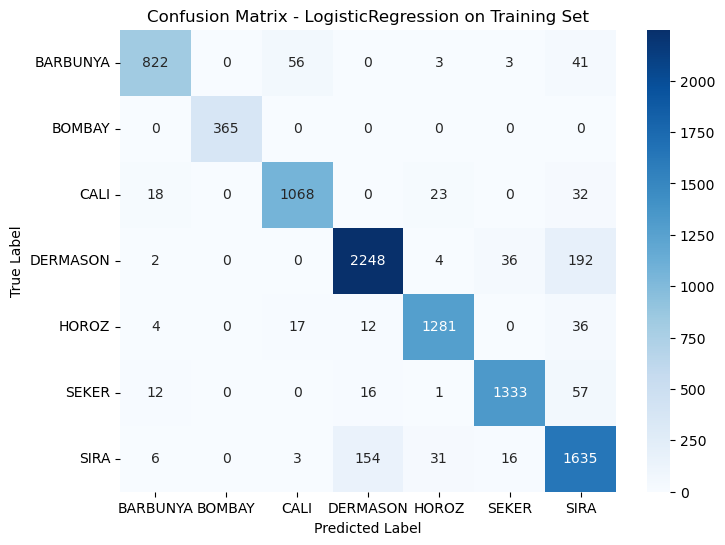


Evaluating Logistic Regression on Test Set:

--- Evaluation on Test Set ---
Accuracy: 0.9153

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.87      0.91       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.93      0.94      0.94       489
    DERMASON       0.92      0.89      0.90      1064
       HOROZ       0.96      0.95      0.95       578
       SEKER       0.94      0.94      0.94       608
        SIRA       0.82      0.90      0.85       791

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

Confusion Matrix:


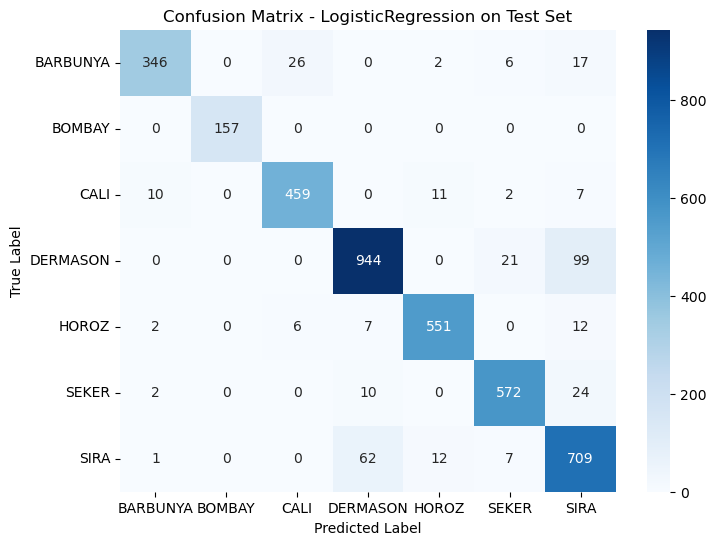


Evaluating Logistic Regression on Entire Dataset:

--- Evaluation on Entire Dataset ---
Accuracy: 0.9176

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.88      0.92      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.93      0.94      0.94      1630
    DERMASON       0.92      0.90      0.91      3546
       HOROZ       0.95      0.95      0.95      1928
       SEKER       0.95      0.94      0.95      2027
        SIRA       0.82      0.89      0.85      2636

    accuracy                           0.92     13611
   macro avg       0.93      0.93      0.93     13611
weighted avg       0.92      0.92      0.92     13611

Confusion Matrix:


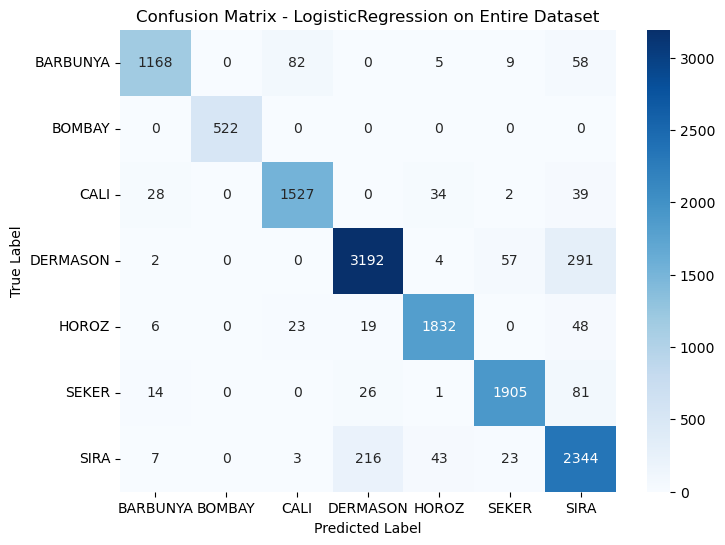


ROC Curve Analysis for Logistic Regression - test set

Multiclass Classification Results (Logistic Regression - test set):
BARBUNYA: AUC = 0.9950
BOMBAY: AUC = 1.0000
CALI: AUC = 0.9955
DERMASON: AUC = 0.9908
HOROZ: AUC = 0.9977
SEKER: AUC = 0.9965
SIRA: AUC = 0.9830

Micro-average AUC: 0.9950


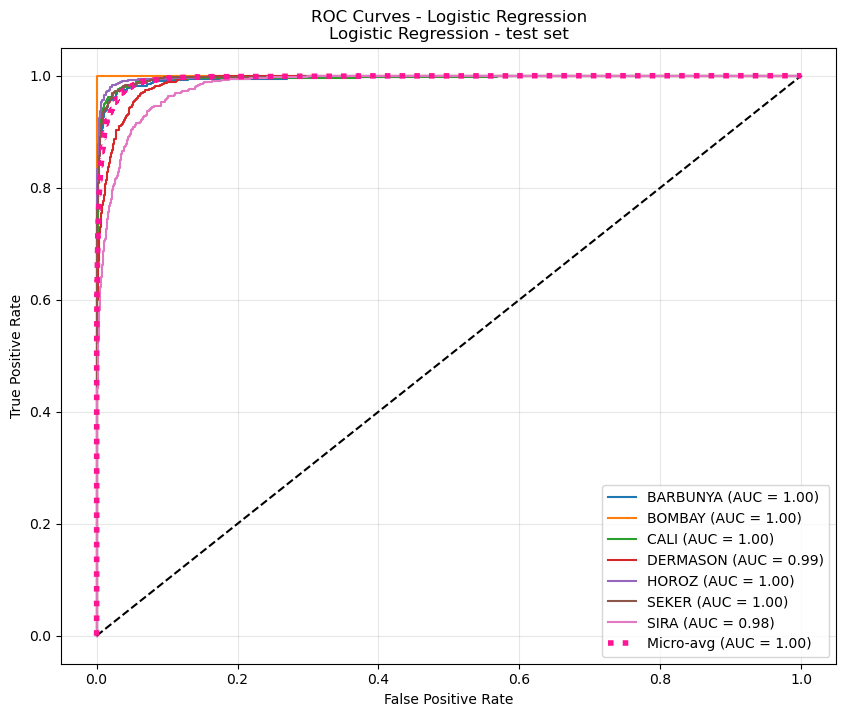

In [ ]:
from sklearn.linear_model import LogisticRegression

print("\n\n--- Training and Evaluating Logistic Regression ---")

log_reg_model = LogisticRegression(
    solver='saga',
    multi_class='ovr', 
    random_state=42,
    max_iter=1000,
    C=1.0
)
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained.")

y_train_pred, y_test_pred, y_all_pred = get_predict(log_reg_model, X_train, X_test, X)
# Evaluate on Training set
print("\nEvaluating Logistic Regression on Training Set:")
evaluate_model(log_reg_model, y_train_pred, y_train, "Training Set", class_names_original)

# Evaluate on Test set
print("\nEvaluating Logistic Regression on Test Set:")
evaluate_model(log_reg_model, y_test_pred, y_test, "Test Set", class_names_original)

# Evaluate on Entire dataset
print("\nEvaluating Logistic Regression on Entire Dataset:")
evaluate_model(log_reg_model, y_all_pred, y, "Entire Dataset", class_names_original)

y_test_scores = log_reg_model.predict_proba(X_test)
plot_roc_and_calculate_auc(y_test_scores, y_test, class_names_original, title_suffix="Logistic Regression - test set")

## 4.2 train decision tree



--- Training and Evaluating Decision Tree Classifier ---
Decision Tree model trained.

Evaluating Decision Tree on Training Set:

--- Evaluation on Training Set ---
Accuracy: 0.9692

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.95      0.96       925
      BOMBAY       1.00      1.00      1.00       365
        CALI       0.96      0.97      0.96      1141
    DERMASON       0.97      0.98      0.97      2482
       HOROZ       0.99      0.97      0.98      1350
       SEKER       0.99      0.98      0.99      1419
        SIRA       0.94      0.95      0.95      1845

    accuracy                           0.97      9527
   macro avg       0.97      0.97      0.97      9527
weighted avg       0.97      0.97      0.97      9527

Confusion Matrix:


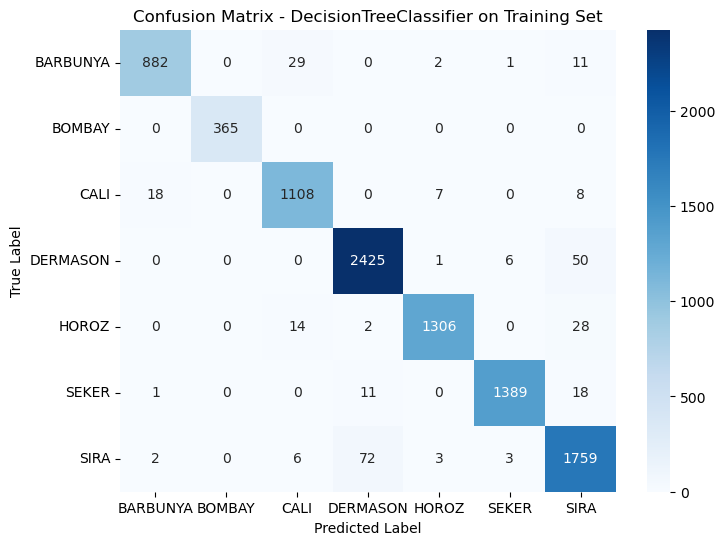


Evaluating Decision Tree on Test Set:

--- Evaluation on Test Set ---
Accuracy: 0.8996

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.90      0.87      0.88       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.90      0.92      0.91       489
    DERMASON       0.89      0.90      0.90      1064
       HOROZ       0.95      0.93      0.94       578
       SEKER       0.93      0.93      0.93       608
        SIRA       0.83      0.83      0.83       791

    accuracy                           0.90      4084
   macro avg       0.92      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084

Confusion Matrix:


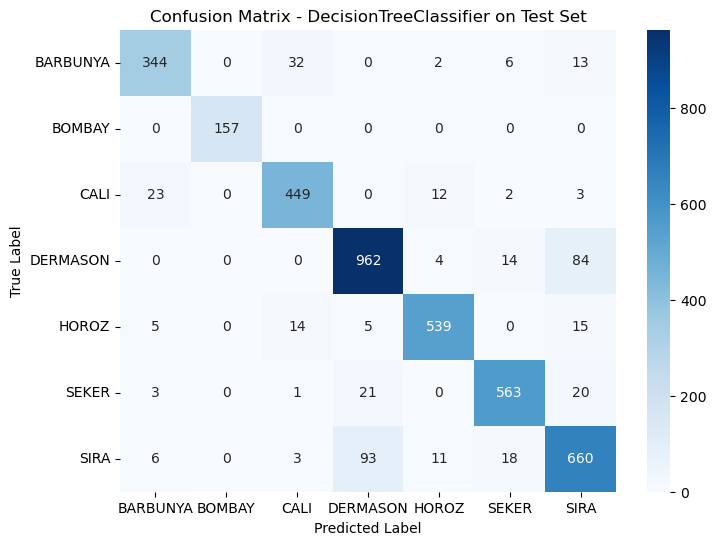


Evaluating Decision Tree on Entire Dataset:

--- Evaluation on Entire Dataset ---
Accuracy: 0.9484

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.93      0.94      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.94      0.96      0.95      1630
    DERMASON       0.94      0.96      0.95      3546
       HOROZ       0.98      0.96      0.97      1928
       SEKER       0.98      0.96      0.97      2027
        SIRA       0.91      0.92      0.91      2636

    accuracy                           0.95     13611
   macro avg       0.96      0.95      0.96     13611
weighted avg       0.95      0.95      0.95     13611

Confusion Matrix:


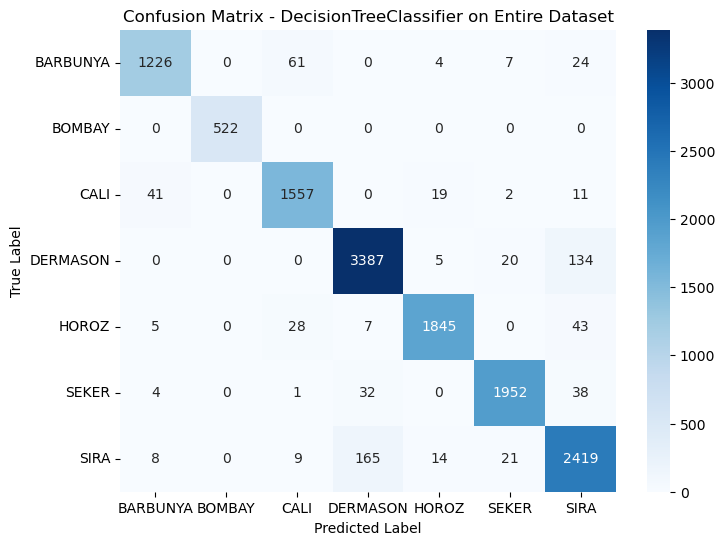


ROC Curve Analysis for Decision Tree - test set

Multiclass Classification Results (Decision Tree - test set):
BARBUNYA: AUC = 0.9519
BOMBAY: AUC = 1.0000
CALI: AUC = 0.9656
DERMASON: AUC = 0.9609
HOROZ: AUC = 0.9720
SEKER: AUC = 0.9688
SIRA: AUC = 0.9342

Micro-average AUC: 0.9640


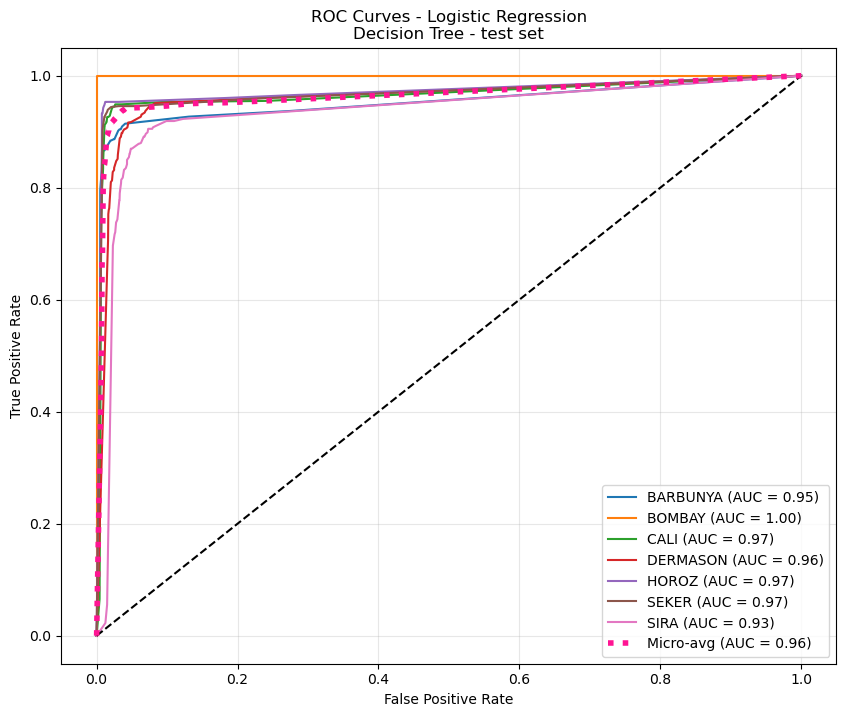

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print("\n\n--- Training and Evaluating Decision Tree Classifier ---")

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10) 
dt_model.fit(X_train, y_train)
print("Decision Tree model trained.")

y_train_pred, y_test_pred, y_all_pred = get_predict(dt_model, X_train, X_test, X)
# Evaluate on Training set
print("\nEvaluating Decision Tree on Training Set:")
evaluate_model(dt_model, y_train_pred, y_train, "Training Set", class_names_original)

# Evaluate on Test set
print("\nEvaluating Decision Tree on Test Set:")
evaluate_model(dt_model, y_test_pred, y_test, "Test Set", class_names_original)

# Evaluate on Entire dataset
print("\nEvaluating Decision Tree on Entire Dataset:")
evaluate_model(dt_model, y_all_pred, y, "Entire Dataset", class_names_original)

y_test_scores = dt_model.predict_proba(X_test)
plot_roc_and_calculate_auc(y_test_scores, y_test, class_names_original, title_suffix="Decision Tree - test set")

## 4.3 train Gradient Boosting Classifier



--- Gradient Boosting Classifier ---
Gradient Boosting model trained.

Evaluating Gradient Boosting Tree (GBT) on Training Set:

--- Evaluation on Training Set ---
Accuracy: 0.9675

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.99      0.98      0.99       925
      BOMBAY       1.00      1.00      1.00       365
        CALI       0.99      0.99      0.99      1141
    DERMASON       0.95      0.97      0.96      2482
       HOROZ       0.99      0.98      0.98      1350
       SEKER       0.98      0.98      0.98      1419
        SIRA       0.94      0.92      0.93      1845

    accuracy                           0.97      9527
   macro avg       0.98      0.97      0.98      9527
weighted avg       0.97      0.97      0.97      9527

Confusion Matrix:


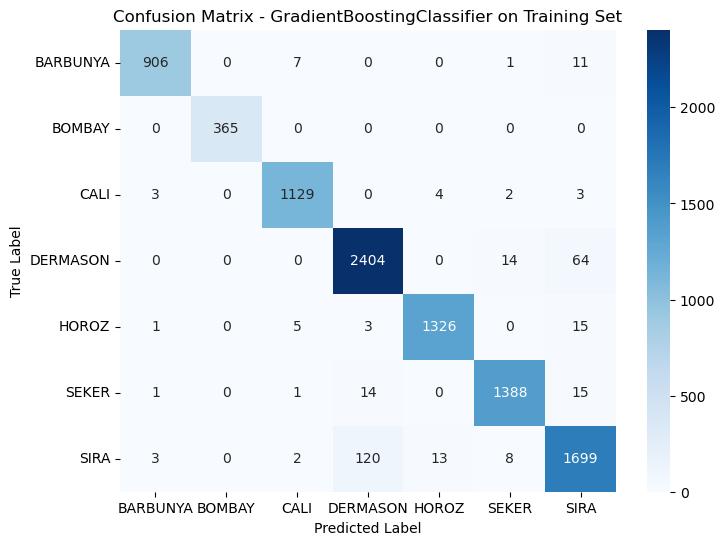


Evaluating Gradient Boosting Tree (GBT) on Test Set:

--- Evaluation on Test Set ---
Accuracy: 0.9194

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.90      0.93       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.95      0.94      0.94       489
    DERMASON       0.89      0.92      0.91      1064
       HOROZ       0.96      0.96      0.96       578
       SEKER       0.95      0.95      0.95       608
        SIRA       0.85      0.84      0.85       791

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

Confusion Matrix:


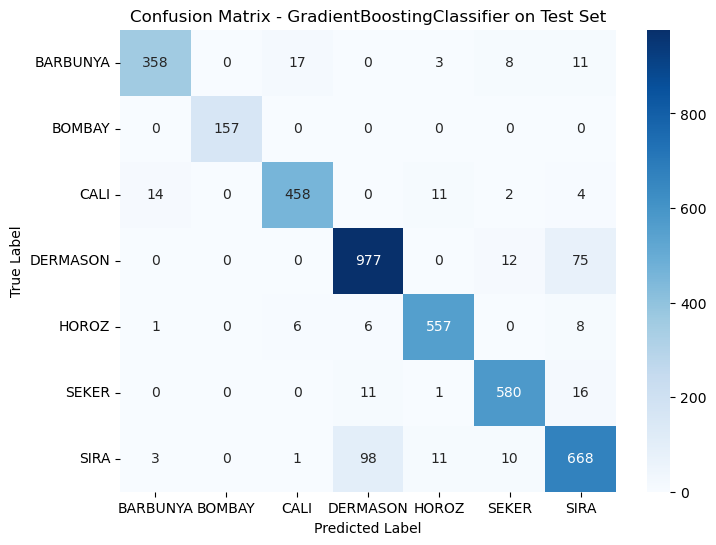


Evaluating Gradient Boosting Tree (GBT) on Entire Dataset:

--- Evaluation on Entire Dataset ---
Accuracy: 0.9531

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.96      0.97      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.98      0.97      0.97      1630
    DERMASON       0.93      0.95      0.94      3546
       HOROZ       0.98      0.98      0.98      1928
       SEKER       0.97      0.97      0.97      2027
        SIRA       0.91      0.90      0.91      2636

    accuracy                           0.95     13611
   macro avg       0.96      0.96      0.96     13611
weighted avg       0.95      0.95      0.95     13611

Confusion Matrix:


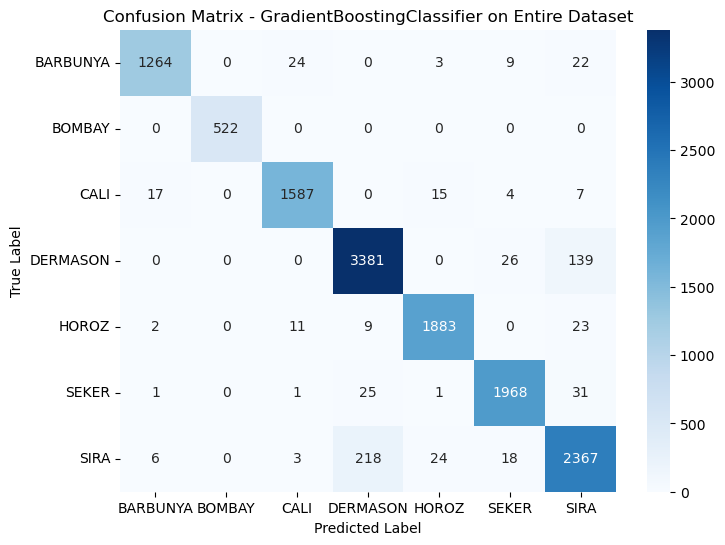


ROC Curve Analysis for Gradient Boosting - test set

Multiclass Classification Results (Gradient Boosting - test set):
BARBUNYA: AUC = 0.9932
BOMBAY: AUC = 1.0000
CALI: AUC = 0.9962
DERMASON: AUC = 0.9915
HOROZ: AUC = 0.9973
SEKER: AUC = 0.9970
SIRA: AUC = 0.9847

Micro-average AUC: 0.9955


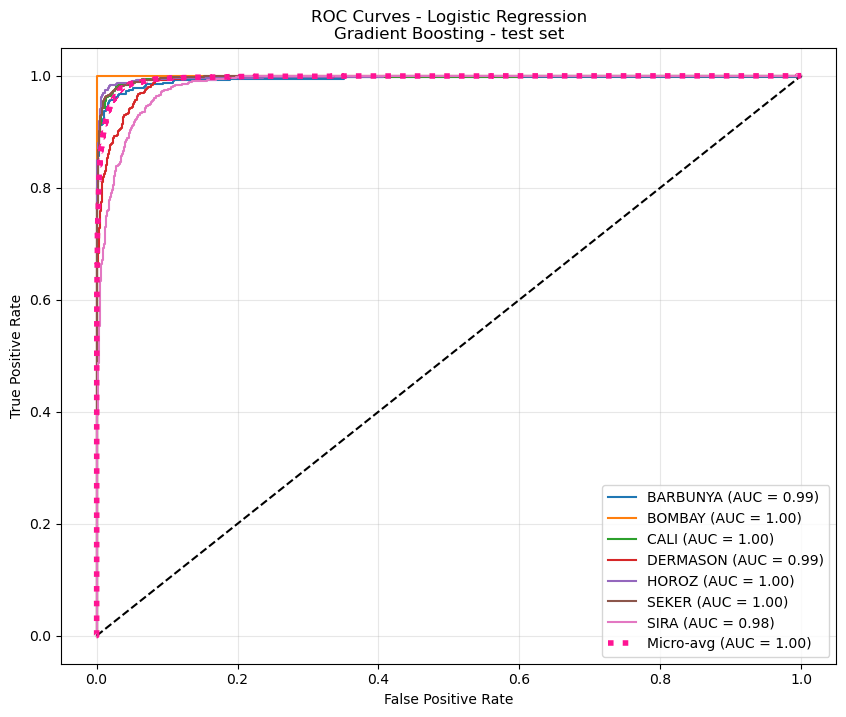

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
print("\n\n--- Gradient Boosting Classifier ---")

gdb_model = GradientBoostingClassifier(random_state=42)
gdb_model.fit(X_train, y_train)
print("Gradient Boosting model trained.")

y_train_pred, y_test_pred, y_all_pred = get_predict(gdb_model, X_train, X_test, X)
# Evaluate on Training set
print("\nEvaluating Gradient Boosting Tree (GBT) on Training Set:")
evaluate_model(gdb_model, y_train_pred, y_train, "Training Set", class_names=class_names_original)

# Evaluate on Test set
print("\nEvaluating Gradient Boosting Tree (GBT) on Test Set:")
evaluate_model(gdb_model, y_test_pred, y_test, "Test Set", class_names=class_names_original)

# Evaluate on Entire dataset
print("\nEvaluating Gradient Boosting Tree (GBT) on Entire Dataset:")
evaluate_model(gdb_model, y_all_pred, y, "Entire Dataset", class_names=class_names_original)

y_test_scores = gdb_model.predict_proba(X_test)
plot_roc_and_calculate_auc(y_test_scores, y_test, class_names_original, title_suffix="Gradient Boosting - test set")

## 4.4 train random forest classifier



--- Training and Evaluating Random Forest Classifier ---
Random Forest model trained.

Evaluating Random Forest on Training Set:

--- Evaluation on Training Set ---
Accuracy: 0.9669

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.99      0.94      0.96       925
      BOMBAY       1.00      1.00      1.00       365
        CALI       0.96      0.98      0.97      1141
    DERMASON       0.95      0.98      0.96      2482
       HOROZ       0.99      0.97      0.98      1350
       SEKER       0.99      0.98      0.99      1419
        SIRA       0.93      0.94      0.94      1845

    accuracy                           0.97      9527
   macro avg       0.97      0.97      0.97      9527
weighted avg       0.97      0.97      0.97      9527

Confusion Matrix:


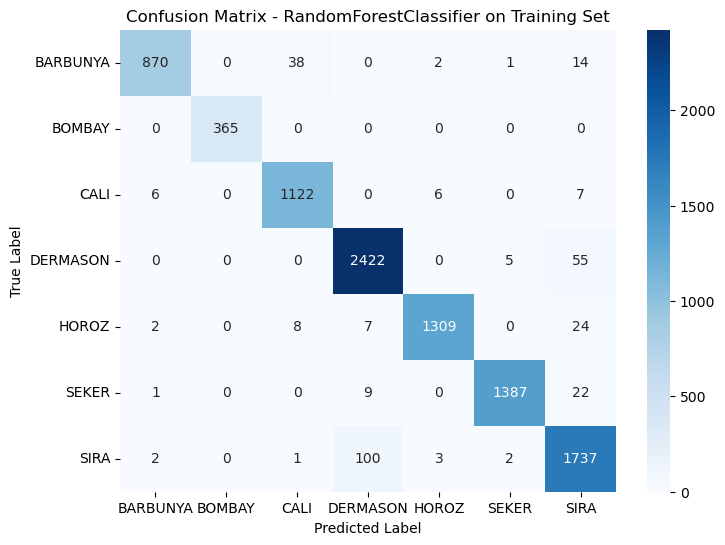


Evaluating Random Forest on Test Set:

--- Evaluation on Test Set ---
Accuracy: 0.9194

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.93      0.94      0.94       489
    DERMASON       0.91      0.91      0.91      1064
       HOROZ       0.96      0.96      0.96       578
       SEKER       0.93      0.94      0.94       608
        SIRA       0.86      0.86      0.86       791

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

Confusion Matrix:


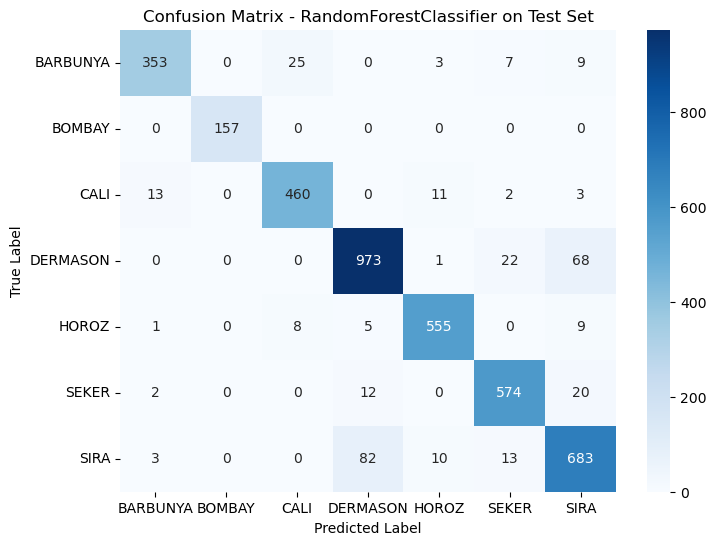


Evaluating Random Forest on Entire Dataset:

--- Evaluation on Entire Dataset ---
Accuracy: 0.9527

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.93      0.95      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.95      0.97      0.96      1630
    DERMASON       0.94      0.96      0.95      3546
       HOROZ       0.98      0.97      0.97      1928
       SEKER       0.97      0.97      0.97      2027
        SIRA       0.91      0.92      0.92      2636

    accuracy                           0.95     13611
   macro avg       0.96      0.96      0.96     13611
weighted avg       0.95      0.95      0.95     13611

Confusion Matrix:


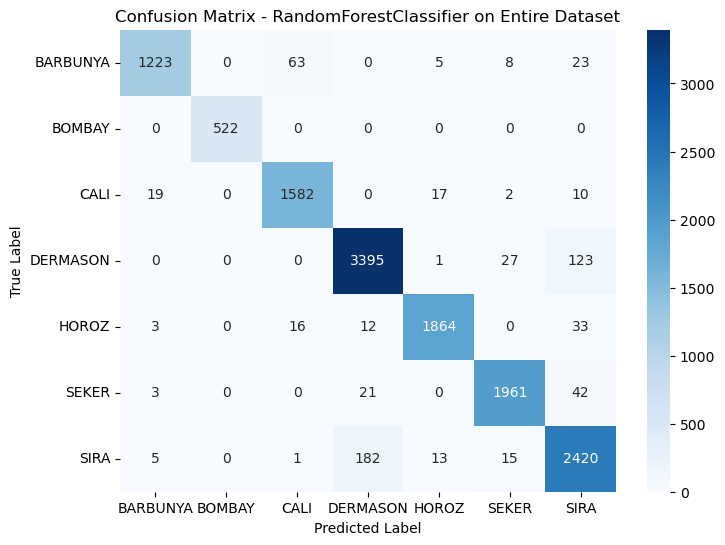


ROC Curve Analysis for Random Forest - test set

Multiclass Classification Results (Random Forest - test set):
BARBUNYA: AUC = 0.9925
BOMBAY: AUC = 1.0000
CALI: AUC = 0.9943
DERMASON: AUC = 0.9919
HOROZ: AUC = 0.9976
SEKER: AUC = 0.9962
SIRA: AUC = 0.9861

Micro-average AUC: 0.9952


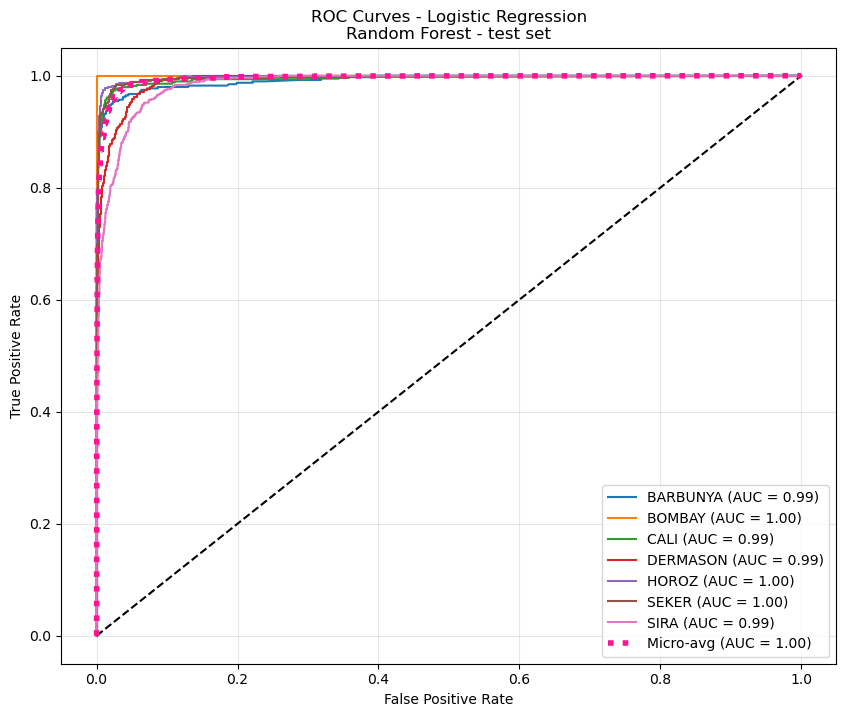

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("\n\n--- Training and Evaluating Random Forest Classifier ---")

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42, 
    max_depth=10,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
print("Random Forest model trained.")

y_train_pred, y_test_pred, y_all_pred = get_predict(rf_model, X_train, X_test, X)
# Evaluate on Training set
print("\nEvaluating Random Forest on Training Set:")
evaluate_model(rf_model, y_train_pred, y_train, "Training Set", class_names_original)

# Evaluate on Test set
print("\nEvaluating Random Forest on Test Set:")
evaluate_model(rf_model, y_test_pred, y_test, "Test Set", class_names_original)

# Evaluate on Entire dataset
print("\nEvaluating Random Forest on Entire Dataset:")
evaluate_model(rf_model, y_all_pred, y, "Entire Dataset", class_names_original)

y_test_scores = rf_model.predict_proba(X_test)
plot_roc_and_calculate_auc(y_test_scores, y_test, class_names_original, title_suffix="Random Forest - test set")

# 5 Evaluation and Choice of Prediction Model
## 5.1 improve model via validation from paramenter finding

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# 禁用ConvergenceWarning警告
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# 查看超参数调优排序 change setting to check the hyperparameter tuning results
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.max_colwidth', None)  # 显示完整单元格内容
pd.set_option('display.expand_frame_repr', False)  # 禁止自动换行

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # 正则化强度倒数
    'solver': ['lbfgs', 'saga', 'newton-cg', 'newton-cholesky'],  # 优化算法
    'multi_class': ['ovr', 'multinomial'],
    'max_iter': [1000, 1500, 2000],  # 最大迭代次数
}

randomized_search = RandomizedSearchCV(   
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    scoring='f1_weighted', 
    cv=5,
    n_iter=20, 
    random_state=42
)

randomized_search.fit(X_train, y_train)

# check the results and hyperparameters combination
results_df = pd.DataFrame(randomized_search.cv_results_)
sorted_results = results_df.sort_values(by='mean_test_score', ascending=False)

print(sorted_results[['params', 'mean_test_score', 'rank_test_score']].head(10))

print(f"best params: {randomized_search.best_params_}")
print(f"best score: {randomized_search.best_score_:.4f}")
best_model = randomized_search.best_estimator_

print("\npreformance on test set")
y_test_pred = best_model.predict(X_test)
print(f"accurracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"f1_score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")


d:\software\anaconda\envs\rm\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "d:\software\anaconda\envs\rm\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\software\anaconda\envs\rm\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_logistic.py", line 1219, in fit
    multi_class = _check_multi_class(self.multi

                                                                             params  mean_test_score  rank_test_score
11  {'solver': 'newton-cg', 'multi_class': 'multinomial', 'max_iter': 1500, 'C': 1}         0.925271                1
16     {'solver': 'saga', 'multi_class': 'multinomial', 'max_iter': 1500, 'C': 100}         0.924729                2
13    {'solver': 'lbfgs', 'multi_class': 'multinomial', 'max_iter': 1500, 'C': 0.1}         0.924151                3
0     {'solver': 'lbfgs', 'multi_class': 'multinomial', 'max_iter': 2000, 'C': 0.1}         0.924151                3
19            {'solver': 'lbfgs', 'multi_class': 'ovr', 'max_iter': 1500, 'C': 100}         0.922349                5
9   {'solver': 'newton-cholesky', 'multi_class': 'ovr', 'max_iter': 1500, 'C': 100}         0.922078                6
15   {'solver': 'newton-cholesky', 'multi_class': 'ovr', 'max_iter': 2000, 'C': 10}         0.920087                7
6               {'solver': 'saga', 'multi_class': 'ovr',

In [ ]:
# hyperparameter tuning for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # 分裂质量评估标准
    'max_depth': [None, 5, 10, 20, 50],          # 树的最大深度
    'min_samples_split': [2, 5, 10],             # 分裂所需最小样本数
    'min_samples_leaf': [1, 2, 4],               # 叶节点最小样本数
    'max_features': ['sqrt', 'log2', None],      # 考虑的最大特征数
    'class_weight': [None, 'balanced']          # 类别权重
}

randomized_search_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    scoring='f1_weighted',
    n_iter=20,
    cv=5,
    random_state=42
)

randomized_search_dt.fit(X_train, y_train)

# check the results and hyperparameters combination
results_df = pd.DataFrame(randomized_search_dt.cv_results_)
sorted_results = results_df.sort_values(by='mean_test_score', ascending=False)

print(sorted_results[['params', 'mean_test_score', 'rank_test_score']].head(10))

print(f"best params: {randomized_search_dt.best_params_}")
print(f"best score: {randomized_search_dt.best_score_:.4f}")
best_model = randomized_search_dt.best_estimator_

print("\npreformance on test set")
y_test_pred = best_model.predict(X_test)
print(f"accurracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"f1_score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")


                                                                                                                                           params  mean_test_score  rank_test_score
3        {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'log_loss', 'class_weight': None}         0.902485                1
4         {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 50, 'criterion': 'gini', 'class_weight': 'balanced'}         0.902339                2
7   {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}         0.901180                3
10            {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'class_weight': None}         0.901148                4
19        {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 50, 'cr

In [ ]:
# 这他妈的跑了几十分钟都没跑出来 hyperparameter tuning for Decision Tree
param_grid_gb = {
    'n_estimators': [50, 100, 200],              # 弱学习器数量
    'learning_rate': [0.001, 0.01, 0.1, 0.5],    # 学习率
    'max_depth': [3, 5, 7],                      # 单棵树的最大深度
    'min_samples_split': [2, 5, 10],             # 分裂所需最小样本数
    'min_samples_leaf': [1, 2, 4],               # 叶节点最小样本数
    'subsample': [0.8, 0.9, 1.0],                # 样本子采样比例
    'max_features': ['sqrt', 'log2', None]       # 特征子采样比例
}

randomized_search_gb = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid_gb,
    scoring='f1_weighted',
    n_iter=20,
    cv=5,
    random_state=42,
    verbose=1
)

randomized_search_gb.fit(X_train, y_train)

# check the results and hyperparameters combination
results_df = pd.DataFrame(randomized_search_gb.cv_results_)
sorted_results = results_df.sort_values(by='mean_test_score', ascending=False)

print(sorted_results[['params', 'mean_test_score', 'rank_test_score']].head(10))

print(f"best params: {randomized_search_gb.best_params_}")
print(f"best score: {randomized_search_gb.best_score_:.4f}")
best_model = randomized_search_gb.best_estimator_

print("\npreformance on test set")
y_test_pred = best_model.predict(X_test)
print(f"accurracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"f1_score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
# hyperparameter tuning for Decision Tree
param_grid_rf = {
    'n_estimators': [50, 100, 200],              # 树的数量
    'criterion': ['gini', 'entropy', 'log_loss'], # 分裂标准
    'max_depth': [None, 5, 10, 20],              # 单棵树的最大深度
    'min_samples_split': [2, 5, 10],             # 分裂所需最小样本数
    'min_samples_leaf': [1, 2, 4],               # 叶节点最小样本数
    'max_features': ['sqrt', 'log2', None],       # 考虑的最大特征数
    'bootstrap': [True, False],                  # 是否有放回采样
    'class_weight': [None, 'balanced', 'balanced_subsample']  # 类别权重
}

randomized_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    scoring='f1_weighted',
    n_iter=20,
    cv=5,
    random_state=42,
)


randomized_search_rf.fit(X_train, y_train)

# check the results and hyperparameters combination
results_df = pd.DataFrame(randomized_search_rf.cv_results_)
sorted_results = results_df.sort_values(by='mean_test_score', ascending=False)

print(sorted_results[['params', 'mean_test_score', 'rank_test_score']].head(10))

print(f"best params: {randomized_search_rf.best_params_}")
print(f"best score: {randomized_search_rf.best_score_:.4f}")
best_model = randomized_search_rf.best_estimator_

print("\npreformance on test set")
y_test_pred = best_model.predict(X_test)
print(f"accurracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"f1_score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")
